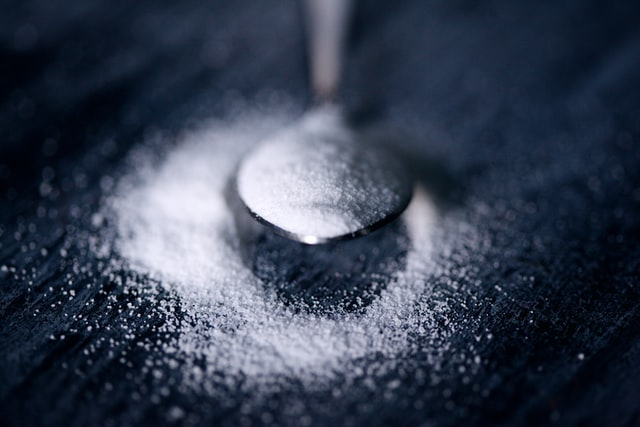



here is the link to the original solution on kaggle: https://www.kaggle.com/code/gkitchen/diabetes-prediction-with-xgboost 

### Import some necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import xgboost as xgb
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('diabetes.csv')

### Create dataframe and examine first few rows

In [2]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,0.000,70.000,96.000
SkinThickness,35.000,29.000,0.000,23.000,35.000,0.000,32.000,0.000,45.000,0.000
Insulin,0.000,0.000,0.000,94.000,168.000,0.000,88.000,0.000,543.000,0.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,0.000
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000


### Initial exploration - no obvious missing values 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### How do the features relate to the target outcome - whether or not diabetes is diagnosed?

In [5]:
df.corr().Outcome.sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

### Let's remove the two lowest ranked features

In [6]:
df = df.drop(columns = ['SkinThickness', 'BloodPressure'])

### Many of the insulin values are 0. Perhaps this is why it has low correlation with the outcome.

In [7]:
print((df.Insulin[df.Insulin == 0]).value_counts())

0    374
Name: Insulin, dtype: int64


### Some data visualisation to display the correlations graphically

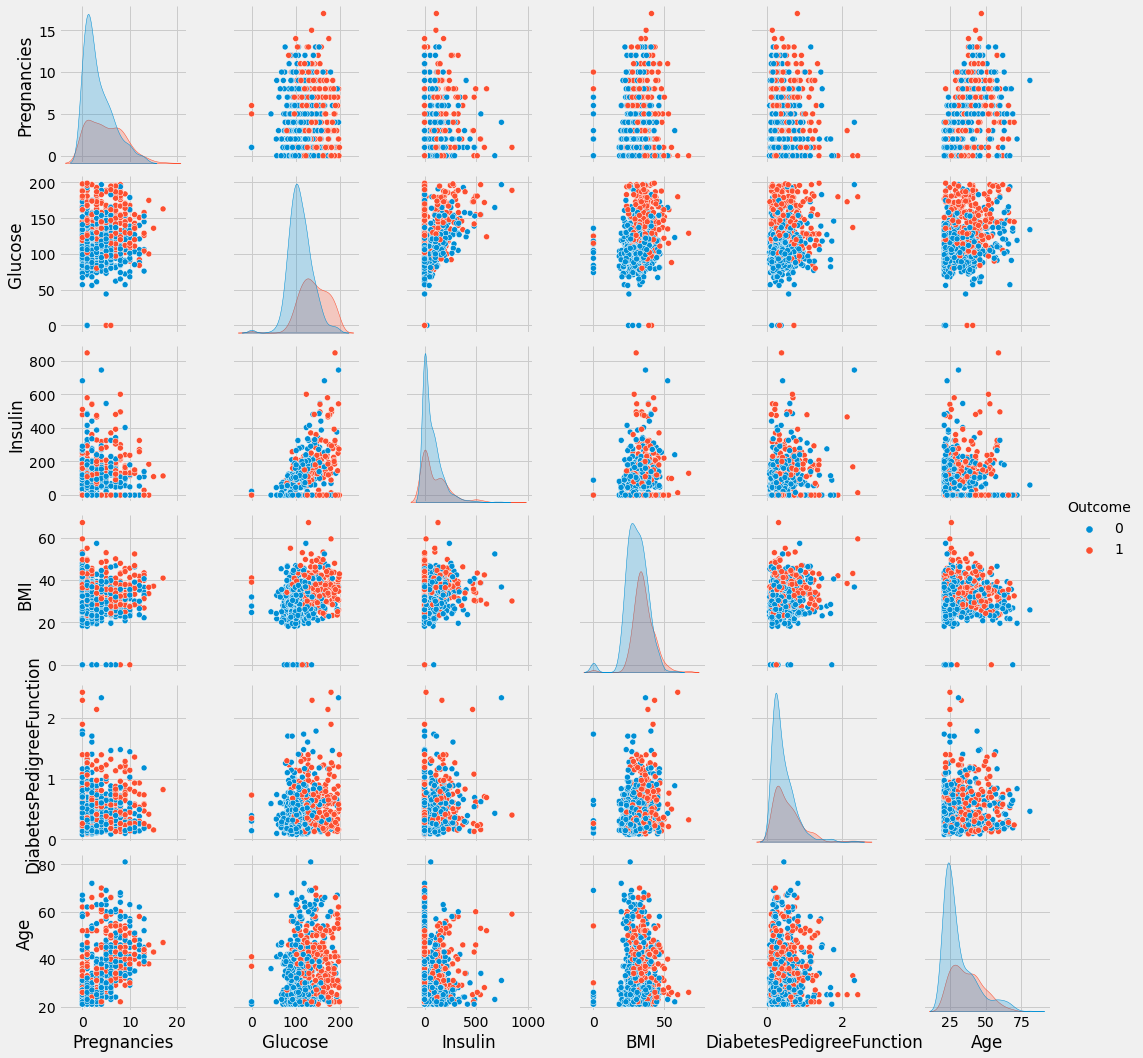

In [8]:
sns.pairplot(data = df, hue = 'Outcome')

### Let's create the feature matrix and the target

In [9]:
X = df.drop(columns = 'Outcome')
y = df['Outcome']

### Split training and testing data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

### Gridsearch CV to find the best hyperparameters for n_estimators and max_depth

In [11]:
param_grid = {
   'n_estimators': [20,40,60],
    'max_depth' : [3,4,5]
}

In [12]:
clf = GridSearchCV(estimator = xgb.XGBClassifier(), param_grid = param_grid, cv = 5, verbose=False, n_jobs=-1)

### Now fit the GridSearch

In [13]:
clf.fit(X_train, y_train, verbose = False)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max

### Find the best hyperparameters

In [14]:
print(clf.best_params_)

{'max_depth': 3, 'n_estimators': 40}


### How successful are the predictions with these parameters? Let's refit the model.

In [15]:
clf_best = xgb.XGBClassifier(**clf.best_params_, use_label_encoder=False, random_state = 123)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
clf_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=40, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=123, ...)

### Model feature importances closely reflect the correlations observed earlier

In [18]:
feature_imp = pd.Series(clf_best.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Glucose                     0.322413
Age                         0.222557
BMI                         0.182672
DiabetesPedigreeFunction    0.098786
Insulin                     0.087648
Pregnancies                 0.085925
dtype: float32

No handles with labels found to put in legend.


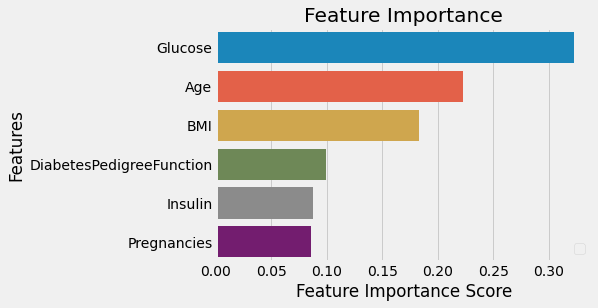

In [19]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.legend()
plt.show()

### And finally a test score with confusion matrix

In [20]:
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))

Accuracy: 0.859


In [21]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[111  11]
 [ 16  54]]


In [22]:
print('Correct predictions:', cf_matrix[0,0] + cf_matrix [1,1])
print('Incorrect predictions:', cf_matrix[0,1] + cf_matrix [1,0])

Correct predictions: 165
Incorrect predictions: 27
